In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Data Set Import 
df=pd.read_csv('/content/drive/MyDrive/spam_mail_detection/spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA(Exploratory data analysis)
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

**1. Data cleaning**

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# Remove->> Unnamed: 2,Unnamed: 3,Unnamed: 4 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# V1 & V2 Columns Rename
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Import Lebel Encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,text
5468,1,URGENT! Last weekend's draw shows that you hav...
4148,0,Haven't found a way to get another app for you...
1225,0,"sir, you will receive the account no another 1..."
3809,0,"Aight, can you text me the address?"
543,0,4 oclock at mine. Just to bash out a flat plan.


In [12]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [13]:
# Check Null Vale
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check  Dublicated Row in this Datasets
df.duplicated().sum()

403

In [15]:
# Remove Dulicated Row
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.shape

(5169, 2)

In [17]:
df.duplicated().sum()

0

**2.EDA(Exploratory data analysis)**

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

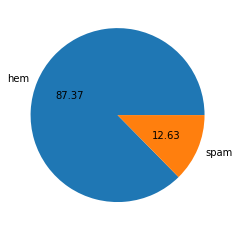

In [19]:
plt.pie(df['target'].value_counts(),labels=['hem','spam'],autopct='%0.2f')
plt.show()

In [20]:

# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# Count Number of Characters
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#Count number of Word
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#Count number of Sentence
df['num_sentens']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_word,num_sentens
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_characters,num_word,num_sentens
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [30]:
df[['num_characters','num_word','num_sentens']].describe()

,num_characters,num_word,num_sentens
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [31]:
#spam
df[df['target']==1][['num_characters','num_word','num_sentens']].describe()

,num_characters,num_word,num_sentens
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [32]:
#hem
df[df['target']==0][['num_characters','num_word','num_sentens']].describe()


,num_characters,num_word,num_sentens
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


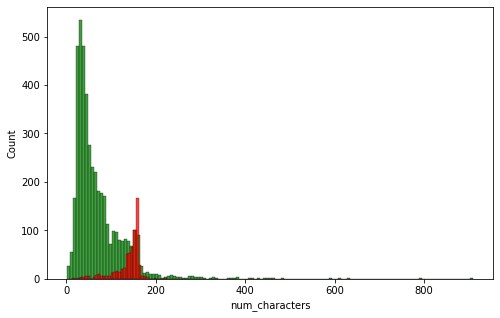

In [33]:
plt.figure(figsize=(8,5))
sn.histplot(df[df['target']==0]['num_characters'],color='green')
sn.histplot(df[df['target']==1]['num_characters'],color='red')

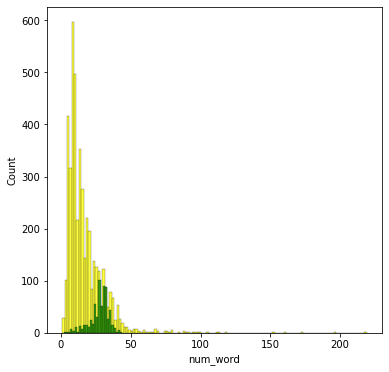

In [34]:
plt.figure(figsize=(6,6))
sn.histplot(df[df['target']==0]['num_word'],color='yellow')
sn.histplot(df[df['target']==1]['num_word'],color='green')

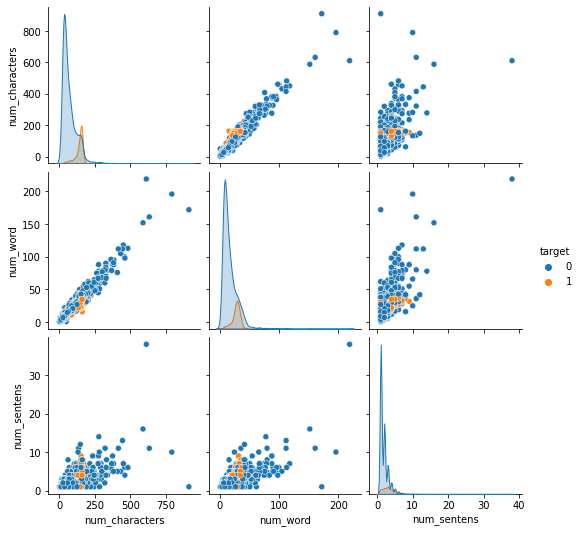

In [35]:
#sns.pairplot(df,hue='target')
sn.pairplot(df,hue='target')

In [36]:
df.corr()

,target,num_characters,num_word,num_sentens
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_word,0.264198,0.965307,1.000000,0.683561
num_sentens,0.267602,0.626118,0.683561,1.000000


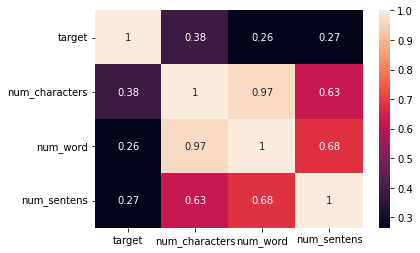

In [37]:
sn.heatmap(df.corr(),annot=True)


**3. Data Preprocessing**

   1. Lower case
   2. Tokenization
   3. Removing special characters
   4. Removing stop words and punctuation
   5. Stemming



In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
print (stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [42]:
all_words = ['There', 'is', 'a', 'tree','near','the','river']
for i in all_words:
  if i not in stopwords.words('english'):
    print(i)

There
tree
near
river


In [43]:
from nltk.stem.porter import PorterStemmer
porterstemmer=PorterStemmer()
porterstemmer.stem('loveing')


'love'

In [44]:
def tex_transform(text):
  text=text.lower()
  txt=nltk.word_tokenize(text)
  y=[]
  for i in txt:
    if i.isalnum():
      y.append(i)
  txt=y[:]
  y=[]
  for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  txt=y[:]
  y=[]
  for i in txt:
    y.append(porterstemmer.stem(i))


  return " ".join(y)
  

In [45]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [46]:
txt='Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [47]:
print(tex_transform(txt))

okay name ur price long legal wen pick u ave x am xx


In [48]:
df['text_transform']=df['text'].apply(tex_transform)

In [49]:
df.head()

,target,text,num_characters,num_word,num_sentens,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud
word_cloud=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:

word_cloud_imge=word_cloud.generate(df[df['target']==1]['text_transform'].str.cat(sep=" "))


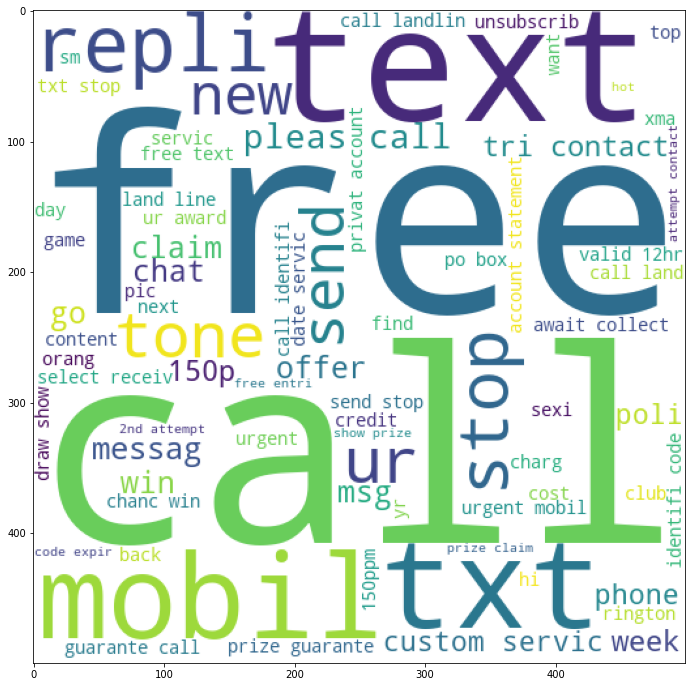

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud_imge)

In [53]:
from wordcloud import WordCloud
word_cloud=WordCloud(width=400,height=400,margin=2,max_words=200,background_color='white',min_font_size=10)


In [54]:
word_img=word_cloud.generate(df[df['target']==0]['text_transform'].str.cat(sep=" "))

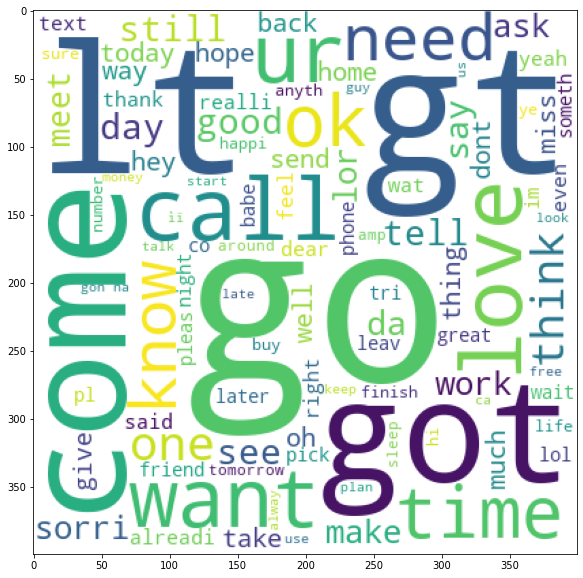

In [55]:

plt.figure(figsize=(10,10))
plt.imshow(word_img)

In [56]:
spam_word=[]
for i in df[df['target']==1]['text_transform'].tolist():
  for word in i.split():
    spam_word.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


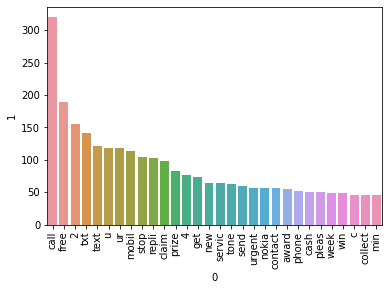

In [57]:

from collections import Counter
sn.barplot(pd.DataFrame(Counter(spam_word).most_common(30))[0],pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()




In [58]:
hem_word=[]
for sms in df[df['target']==0]['text_transform'].tolist():
  for word in sms.split():
    hem_word.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


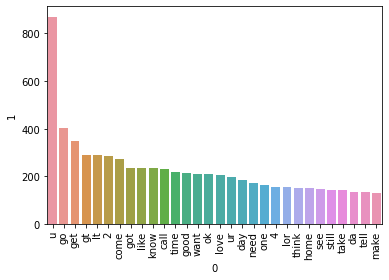

In [59]:
from collections import Counter
sn.barplot(pd.DataFrame(Counter(hem_word).most_common(30))[0],pd.DataFrame(Counter(hem_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
#Countvectorizer import

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [61]:
# 
X=cv.fit_transform(df['text_transform']).toarray()

In [62]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [65]:
X_train.shape

(4135, 6629)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
# Object Create
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [68]:
# GaussianNB algorithom Use
gnb.fit(X_train,y_train)
ypd1=gnb.predict(X_test)
print(accuracy_score(y_test,ypd1))
print(confusion_matrix(y_test,ypd1))
print(precision_score(y_test,ypd1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [69]:
# Multinomial Naive Base Alogorithom Use

mnb.fit(X_train,y_train)
ypd2=mnb.predict(X_test)
print(accuracy_score(y_test,ypd2))
print(confusion_matrix(y_test,ypd2))
print(precision_score(y_test,ypd2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [70]:
#Bernolium Naive Base Use.
bnb.fit(X_train,y_train)
ypd3=bnb.predict(X_test)
print(accuracy_score(y_test,ypd3))
print(confusion_matrix(y_test,ypd3))
print(precision_score(y_test,ypd3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [71]:
# TfidfVectorizer use of new Model Create
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)


In [72]:
X=tfidf.fit_transform(df['text_transform']).toarray()
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
# GaussianNB algorithom Use
gnb.fit(X_train,y_train)
ypd1=gnb.predict(X_test)
print(accuracy_score(y_test,ypd1))
print(confusion_matrix(y_test,ypd1))
print(precision_score(y_test,ypd1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [74]:
# Multinomial Naive Base Alogorithom Use
mnb.fit(X_train,y_train)
ypd2=mnb.predict(X_test)
print(accuracy_score(y_test,ypd2))
print(confusion_matrix(y_test,ypd2))
print(precision_score(y_test,ypd2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [75]:
#Bernolium Naive Base Use.
bnb.fit(X_train,y_train)
ypd3=bnb.predict(X_test)
print(accuracy_score(y_test,ypd3))
print(confusion_matrix(y_test,ypd3))
print(precision_score(y_test,ypd3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
def best_acc_test(clfs,X_train,y_train,X_test,y_test):
  clfs.fit(X_train,y_train)
  y_pd=clfs.predict(X_test)
  accuracy=accuracy_score(y_test,y_pd)
  precission=precision_score(y_test,y_pd)
  return accuracy,precission

In [80]:
best_acc_test(mnb,X_train,y_train,X_test,y_test)

(0.9729206963249516, 1.0)

In [81]:
accuracy_s=[]
precission_s=[]
for name,model in clfs.items():
  accuracy,precission=best_acc_test(model,X_train,y_train,X_test,y_test)
  print(f" Model Name is: {name}\n Accuracy: {accuracy}\n Precession:{precission} ")
  accuracy_s.append(accuracy)
  precission_s.append(precission)

 Model Name is: SVC
 Accuracy: 0.9748549323017408
 Precession:0.9666666666666667 
 Model Name is: KN
 Accuracy: 0.9052224371373307
 Precession:1.0 
 Model Name is: NB
 Accuracy: 0.9729206963249516
 Precession:1.0 
 Model Name is: DT
 Accuracy: 0.9332688588007737
 Precession:0.8484848484848485 
 Model Name is: LR
 Accuracy: 0.9574468085106383
 Precession:0.9519230769230769 
 Model Name is: RF
 Accuracy: 0.971953578336557
 Precession:0.9739130434782609 
 Model Name is: AdaBoost
 Accuracy: 0.9642166344294004
 Precession:0.9316239316239316 
 Model Name is: BgC
 Accuracy: 0.9545454545454546
 Precession:0.8527131782945736 
 Model Name is: ETC
 Accuracy: 0.9777562862669246
 Precession:0.9831932773109243 
 Model Name is: GBDT
 Accuracy: 0.9487427466150871
 Precession:0.9292929292929293 
 Model Name is: xgb
 Accuracy: 0.9468085106382979
 Precession:0.946236559139785 


In [82]:
performance_df=pd.DataFrame({'Algorithams':clfs.keys(),'Accuracy':accuracy_s,'Precission':precission_s}).sort_values("Precission",ascending=False)

In [83]:
performance_df

,Algorithams,Accuracy,Precission
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
10,xgb,0.946809,0.946237
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
7,BgC,0.954545,0.852713


In [84]:
performance_df1=pd.melt(performance_df,id_vars='Algorithams')
performance_df1

,Algorithams,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,xgb,Accuracy,0.946809
7,AdaBoost,Accuracy,0.964217
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.954545


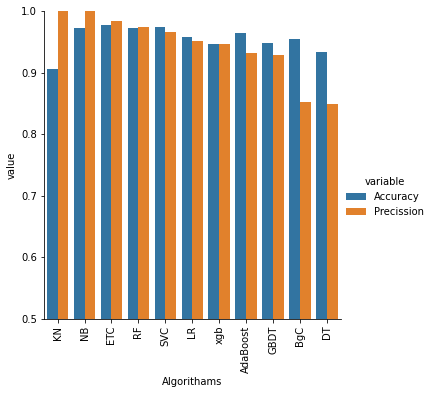

In [85]:
sn.catplot(x='Algorithams',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [87]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svc', svc), ('nb', mnb), ('et', etc)],voting='soft')



In [88]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [89]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.975609756097561


In [90]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [91]:
from sklearn.ensemble import StackingClassifier

In [92]:
stacking_classifier=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [93]:
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [94]:
y_pred = stacking_classifier.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [97]:
mnb.fit(X_train,y_train)
import pickle
pickle.dump(tfidf,open('/content/drive/MyDrive/spam_mail_detection/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/spam_mail_detection/multi_nomial_nb.pkl','wb'))

In [96]:
mnb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])